<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assignment9_Feature_maps_using_3_pre_trained_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report on how feature maps of different convolutional layers look when you pass your favourite image through your three favourite pre-trained CNN classifiers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model


In [ ]:
def load_image():
  img_path = "/content/drive/MyDrive/rose.jpeg"
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  return img_array

In [ ]:
def visualize_feature_maps(img_array, model, preprocess_function, model_name, layer_name, max_maps=16):

    # Preprocess image
    processed_img = preprocess_function(img_array.copy())

    # Create intermediate model
    layer_output = model.get_layer(layer_name).output
    feature_model = Model(inputs=model.input, outputs=layer_output)

    # Get feature maps
    feature_maps = feature_model.predict(processed_img)

    print(f"{model_name} - Layer: {layer_name}")
    print("Feature map shape:", feature_maps.shape)

    # Plot first few feature maps
    n = min(max_maps, feature_maps.shape[-1])

    plt.figure(figsize=(12,8))
    for i in range(n):
        plt.subplot(4,4,i+1)
        plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
        plt.axis("off")

    plt.suptitle(f"{model_name} - {layer_name}")
    plt.show()


In [ ]:
def main():
  img_array = load_image()

  vgg = VGG16(weights='imagenet', include_top=False)
  resnet = ResNet50(weights='imagenet', include_top=False)
  mobilenet = MobileNetV2(weights='imagenet', include_top=False)

  # VGG-16
  visualize_feature_maps(img_array, vgg, vgg_preprocess, "VGG16", layer_name="block1_conv1")
  visualize_feature_maps(img_array, vgg, vgg_preprocess, "VGG16", layer_name="block5_conv3")

  # ResNet50
  visualize_feature_maps(img_array, resnet, resnet_preprocess, "ResNet50", layer_name="conv1_conv")
  visualize_feature_maps(img_array, resnet, resnet_preprocess, "ResNet50", layer_name="conv5_block3_out")

  # MobileNetV2
  visualize_feature_maps(img_array, mobilenet, mobilenet_preprocess, "MobileNetV2", layer_name="Conv1")
  visualize_feature_maps(img_array, mobilenet, mobilenet_preprocess, "MobileNetV2", layer_name="block_16_project")



/tmp/ipython-input-857847169.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
VGG16 - Layer: block1_conv1
Feature map shape: (1, 224, 224, 64)


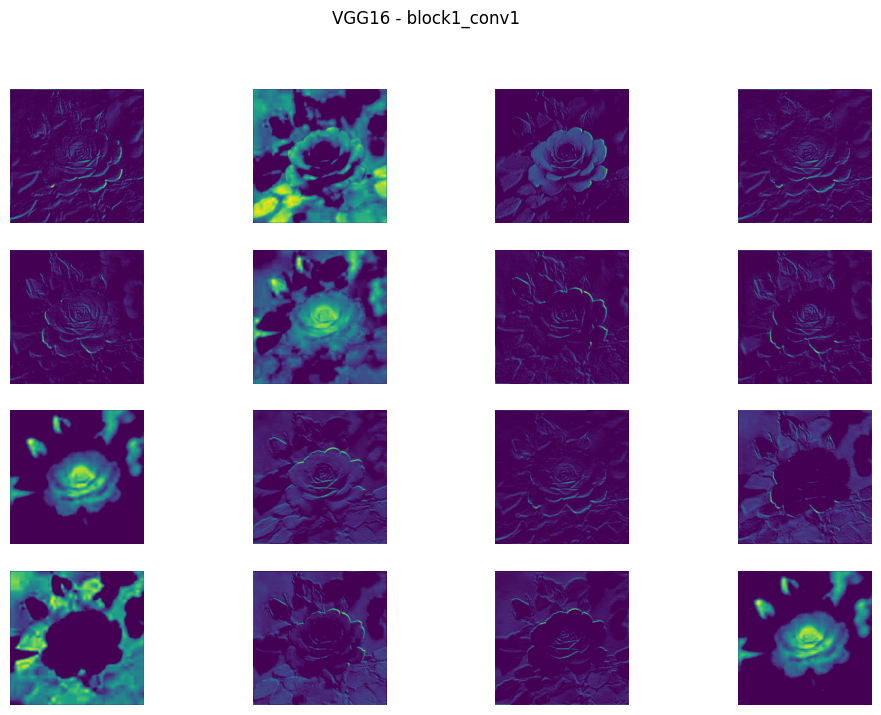

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
VGG16 - Layer: block5_conv3
Feature map shape: (1, 14, 14, 512)


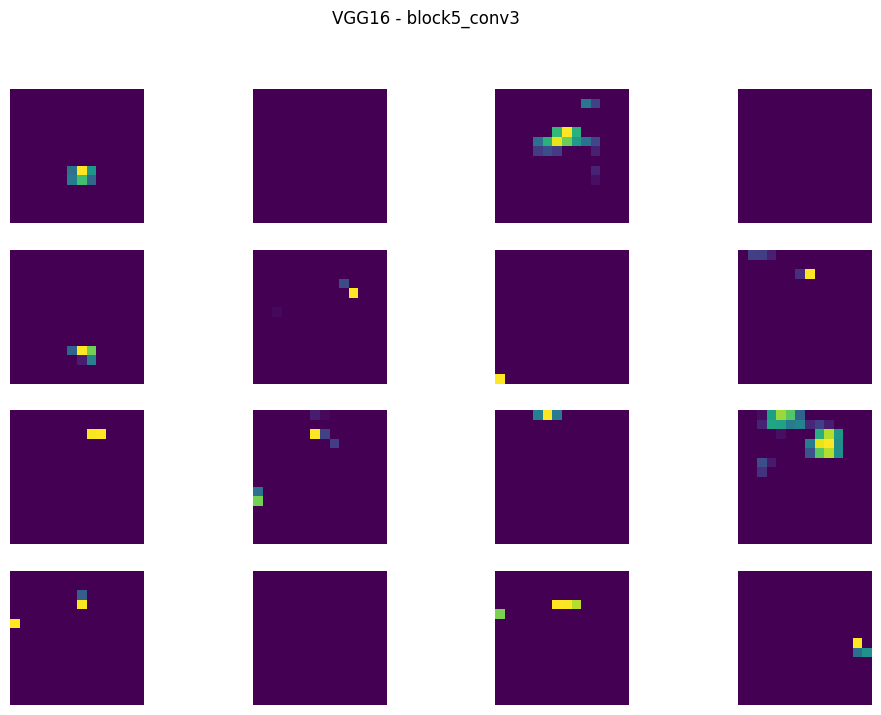

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
ResNet50 - Layer: conv1_conv
Feature map shape: (1, 112, 112, 64)


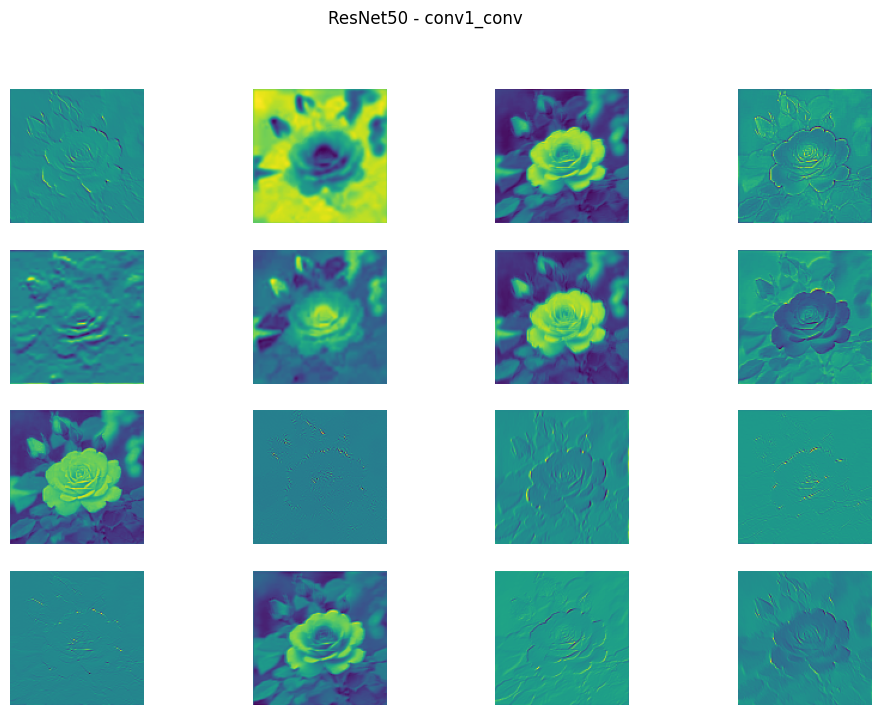

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
ResNet50 - Layer: conv5_block3_out
Feature map shape: (1, 7, 7, 2048)


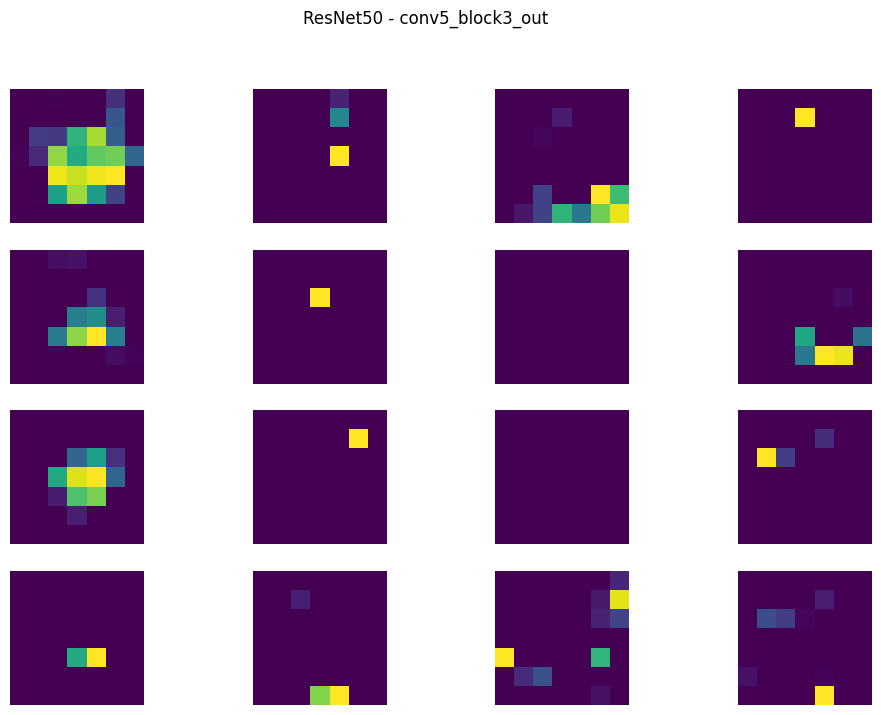

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
MobileNetV2 - Layer: Conv1
Feature map shape: (1, 112, 112, 32)


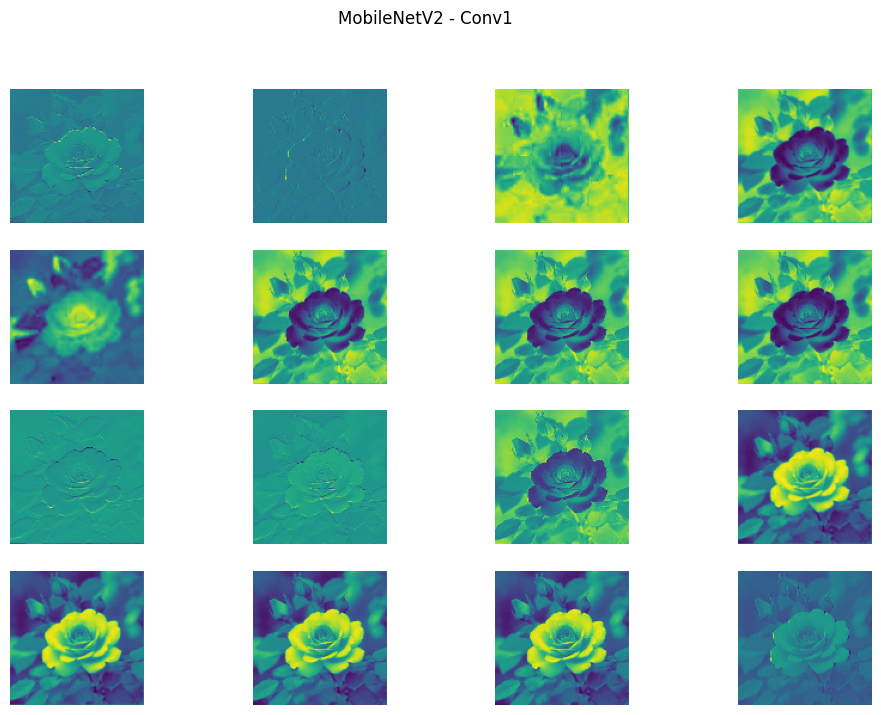

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
MobileNetV2 - Layer: block_16_project
Feature map shape: (1, 7, 7, 320)


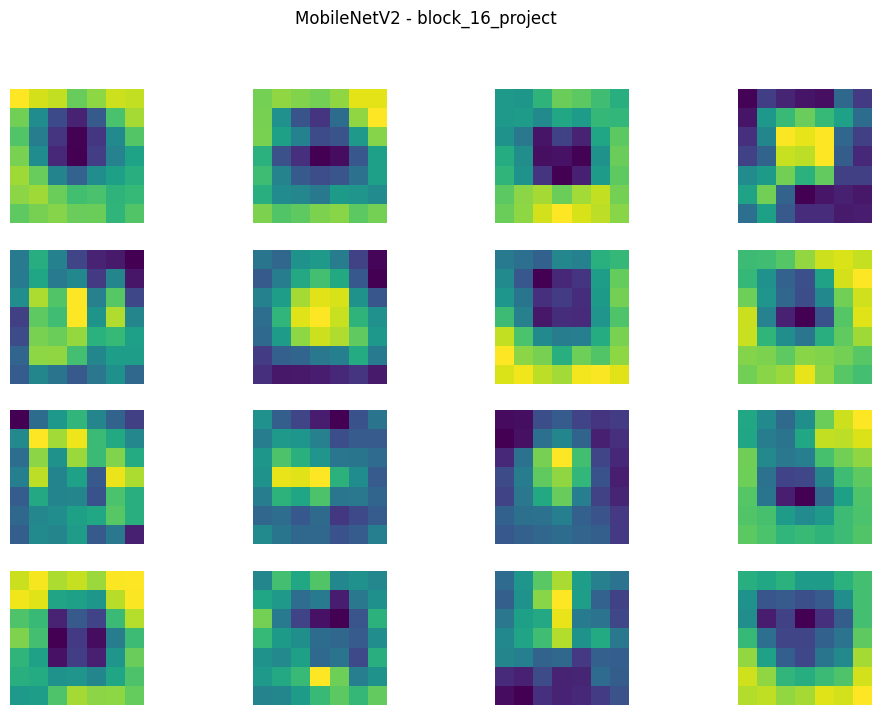

In [ ]:
if __name__ == '__main__':
  main()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model

# # ---- Load image ----
# img_path = "/content/drive/MyDrive/rose.jpeg"
# img = image.load_img(img_path, target_size=(224,224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # ---- Load pretrained model ----
# model = VGG16(weights='imagenet', include_top=False)

# # ---- Choose convolution layer ----
# layer_name = "block1_conv1"   # try block5_conv3 for deep layer

# # ---- Create feature extractor model ----
# feature_model = Model(inputs=model.input,
#                       outputs=model.get_layer(layer_name).output)

# # ---- Get feature maps ----
# feature_maps = feature_model.predict(x)

# print("Feature map shape:", feature_maps.shape)

# # ---- Visualize first 16 maps ----
# plt.figure(figsize=(8,8))
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
#     plt.axis('off')

# plt.show()
